In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.signal import detrend
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath 
from hyperellipsoid import hyperellipsoid
from psd import psd
import tkinter as tk
from tkinter import filedialog
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(initialdir='./../data/')
fx, fy, fz, mx, my, mz = np.loadtxt(file_path, delimiter=',', unpack=True)
fx = fx[10000:40000]
fy = fy[10000:40000]
fz = fz[10000:40000]
mx = mx[10000:40000]
my = my[10000:40000]
mz = mz[10000:40000]
COPap = (-my / fz) * 100
COPml = (mx / fz) * 100
freq = 1000
b, a = butter(4, (5/(freq/2)), btype = 'low')
COPap = filtfilt(b, a, COPap)
COPml = filtfilt(b, a, COPml)
fx_filt = filtfilt(b, a, fx)
fy_filt = filtfilt(b, a, fy)
fz_filt = filtfilt(b, a, fz)
COPap = detrend(COPap, axis=0, type='constant')
COPml = detrend(COPml, axis=0, type='constant')
t = np.linspace(0, COPap.shape[0]/freq, COPap.shape[0])
line_zero = np.zeros_like(fx_filt)

# Ground Reaction Forces

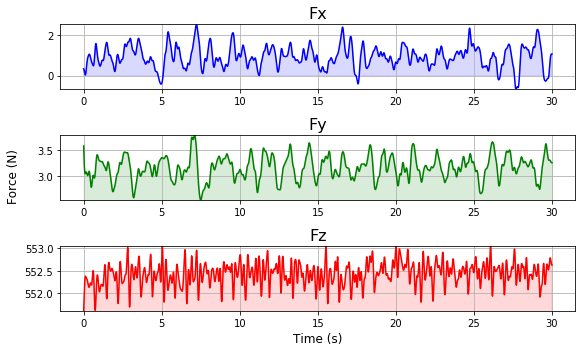

In [4]:
fig = plt.figure(figsize = (8, 5))
ax1 = fig.add_subplot(311)
ax1.plot(t, fx_filt, 'b')
#ax1.fill(t, fx_filt, 'b', alpha=0.25)
#ax1.fill_between(t, line_zero, fx_filt>0, 'b', alpha=0.25)
ax1.fill_between(t, fx_filt, where=fx_filt>=line_zero, interpolate=True, color='blue', alpha=0.15)
ax1.set_ylim([min(fx_filt), max(fx_filt)])
ax1.set_title('Fx', fontsize=16)
ax1.grid()
ax2 = fig.add_subplot(312)
ax2.plot(t, fy_filt, 'g')
ax2.fill_between(t, fy_filt, where=fy_filt>=line_zero, interpolate=True, color='green', alpha=0.15)
ax2.set_ylim([min(fy_filt), max(fy_filt)])
ax2.set_title('Fy', fontsize=16)
fig.text(0, 0.5, 'Force (N)', ha='center', va='center',
         rotation='vertical', fontsize=12)
ax2.grid()
ax3 = fig.add_subplot(313)
ax3.plot(t, fz_filt, 'r')
ax3.fill_between(t, fz_filt, where=fz_filt>=line_zero, interpolate=True, color='red', alpha=0.15)
ax3.set_ylim([min(fz_filt), max(fz_filt)])
ax3.set_title('Fz', fontsize=16)
ax3.grid()
ax3.set_xlabel('Time (s)', fontsize=12)
plt.tight_layout()

In [5]:
def cop_plot(freq, COPap, COPml, units='cm'):
    '''
    Plot COP data from postural sway measurement.
    '''
    import matplotlib.gridspec as gridspec
    t = np.linspace(0, COPap.shape[0]/freq, COPap.shape[0])
    plt.rc('axes', labelsize=16,  titlesize=16)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.figure(figsize=(10, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
    ax1 = plt.subplot(gs[0])
    ax1.plot(t, COPap, lw=2, color=[0, 0, 1, 1], label='ap')
    ax1.plot(t, COPml, lw=2, color=[1, 0, 0, 1], label='ml')
    ax1.set_xlim([t[0], t[-1]])
    ax1.grid()
    ax1.locator_params(axis='both', nbins=5)
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('COP [%s]' %units)
    ax1.set_title('Stabilogram')
    ax1.legend(fontsize=12, loc='best', framealpha=.5)
    ax2 = plt.subplot(gs[1])
    ax2.plot(COPml, COPap, lw=2, color='g')
    ax2.set_xlabel('COP ml [%s]' %units)
    ax2.set_ylabel('COP ap [%s]' %units)
    ax2.set_title('Statokinesigram')
    if 0:  # plot the axes with the same colors of the COP data
        ax2.xaxis.label.set_color('red')
        ax2.spines['bottom'].set_color('red')
        ax2.tick_params(axis='x', colors='red')
        ax2.yaxis.label.set_color('blue')
        ax2.spines['left'].set_color('blue')
        ax2.tick_params(axis='y', colors='blue')
    ax2.grid()
    ax2.locator_params(axis='both', nbins=5)
    plt.tight_layout()
    plt.show()

## Center of Pressure (COP) in Anterior-posterior (COPap) and Medial-lateral (COPml) directions

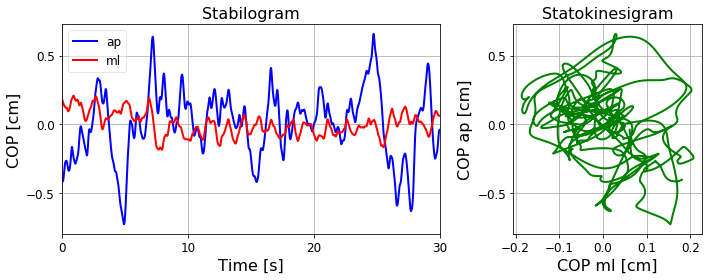

In [6]:
cop_plot(freq, COPap, COPml)

In [7]:
deslocamento_total_COP = sum(np.sqrt((COPap**2 + COPml**2)));
perimetro_COPap = sum(abs(np.diff(COPap)));
perimetro_COPml = sum(abs(np.diff(COPml)));
vel_media_COPap = sum(abs(np.diff(COPap)))*(freq/COPap.shape[0]);
vel_media_COPml = sum(abs(np.diff(COPml)))*(freq/COPml.shape[0]);
vel_media_total_COP = sum(np.sqrt(np.diff(COPap)**2+np.diff(COPml)**2))*(freq/COPap.shape[0]);
print("COP Total Displacement: ",deslocamento_total_COP)
print("COPap perimeter: ",perimetro_COPap)
print("COPml perimeter: ",perimetro_COPml)
print("COPap Mean Velocity: ",vel_media_COPap)
print("COPml Mean Velocity: ",vel_media_COPml)
print("COP Total Mean Velocity: ",vel_media_total_COP)

COP Total Displacement:  6435.828887154459
COPap perimeter:  19.430739951550905
COPml perimeter:  7.0872232104987924
COPap Mean Velocity:  0.6476913317183635
COPml Mean Velocity:  0.23624077368329308
COP Total Mean Velocity:  0.7223660939538367


# Prediction Ellipse Area 95%

In [ ]:
area, axes, angles, center, R = hyperellipsoid(COPml, COPap, units='cm', show=True)
print('Area =', area)
print('Semi-axes =', axes)
print('Angles =', angles)
print('Center =', center)
print('Rotation matrix =\n', R)

# Spectral Analysis of Center of Pressure in Anterior-posterior direction

In [ ]:
fp_ap, mf_ap, fmax_ap, Ptot_ap, F, P_ap = psd(COPap, fs=freq, scales='linear', xlim=[0, 2], units='cm')

# Spectral Analysis of Center of Pressure in Medial-lateral direction

In [ ]:
fp_ml, mf_ml, fmax_ml, Ptot_ml, F, P_ml = psd(COPml, fs=freq, xlim=[0, 2], units='cm')